In [2]:
!pip install nltk
!pip instal gensim

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt_tab')
data = []
sample_text="""the bank of the river was covered with lush green grass,
and people were enjoying the peaceful view  on the other side, 
the bank where the financial institution is located had a busy crowd of customers and workers despite the difference in activities, 
both places offered a sense of stability and support to those who visited them"""
sample_text= sample_text.replace("\n", " ")
for i in sent_tokenize(sample_text):
	temp = []
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)
# creating our CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
								vector_size=2, window=5)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:


# Assuming `model` is your trained Word2Vec model
model1.save("word2vec_model.model")  # Save in Gensim's native format
model1.wv.save_word2vec_format("word2vec_model.bin", binary=True)  # Save in binary Word2Vec format
model1.wv.save_word2vec_format("word2vec_model.txt", binary=False)  # Save in plain text Word2Vec format


In [13]:
print("Cosine similarity between 'bank' " +"and 'financial' - CBOW : ",model1.wv.similarity('bank', 'financial'))

Cosine similarity between 'bank' and 'grass' - CBOW :  0.90064776


In [14]:
print("Cosine similarity between 'bank' " +"and 'river' - CBOW : ",model1.wv.similarity('bank', 'river'))

Cosine similarity between 'bank' and 'river' - CBOW :  -0.72492427


In [16]:
model1.wv.get_vector('bank')

array([ 0.36906847, -0.07661173], dtype=float32)

In [17]:
from transformers import BertTokenizer, BertModel
import torch
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
def get_word_embedding(sentence, target_word):
    # Tokenize input sentence
    inputs = tokenizer(sentence, return_tensors="pt") 
    # Forward pass through BERT
    with torch.no_grad():
        outputs = model(**inputs)
    # Extract hidden states (last layer) from BERT
    hidden_states = outputs.last_hidden_state
    # Find the position of the target word
    target_index = inputs.input_ids[0].tolist().index(tokenizer.encode(target_word, add_special_tokens=False)[0])
    # Extract the embedding for the target word (average of the token embeddings)
    target_embedding = hidden_states[0, target_index].numpy()
    return target_embedding
# Example sentences with the word "bank"
sentence1 = "I went to the bank of the river to relax."
sentence2 = "I deposited money into my bank account this morning."
# Get embeddings for both contexts of the word "bank"
embedding1 = get_word_embedding(sentence1, "bank")
embedding2 = get_word_embedding(sentence2, "bank")
print("Embedding for 'bank' in river context:")
print(embedding1)
print("\nEmbedding for 'bank' in financial context:")
print(embedding2)


C:\Users\ujwal\Twin_tower_model\twin_model\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Embedding for 'bank' in river context:
[-2.33406067e-01 -4.92273986e-01 -3.51480424e-01 -5.49867824e-02
 -4.62861836e-01 -7.38765299e-02 -4.78137955e-02  1.59845054e+00
  5.08617535e-02 -5.28456926e-01  1.12227750e+00  4.98486668e-01
  4.85102385e-01  1.54275879e-01 -1.09642434e+00  1.98596925e-01
 -1.10387050e-01 -1.98050916e-01  7.30857193e-01  4.60049897e-01
  1.62699342e-01  3.72431844e-01 -7.90162012e-02  7.05300331e-01
  1.52129367e-01  3.16909432e-01  8.48197579e-01 -3.82809848e-01
  3.58578563e-01  2.07555205e-01  1.28453505e+00  1.88013986e-01
 -4.77095582e-02  3.20771813e-01 -5.72809815e-01 -1.18513867e-01
 -3.12102214e-03 -5.78482985e-01 -3.03711653e-01  1.00537312e+00
 -8.31644833e-01 -1.24726546e+00 -4.94717270e-01  6.69835091e-01
  1.46005750e-02  2.89321661e-01  3.71036977e-02  1.44049719e-01
  1.34086102e-01  2.39730299e-01 -3.64740431e-01  9.86795962e-01
  4.79765758e-02 -7.11301208e-01  1.26156539e-01  2.32834220e-01
 -5.21492183e-01 -9.73514915e-01 -6.55071735e-01 -1

Cosine Similarity: 0.4569116234779358


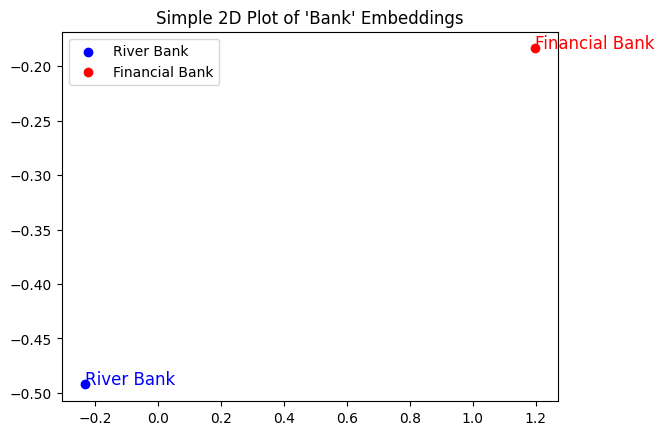

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity between the two embeddings
def compute_cosine_similarity(embedding1, embedding2):
    cosine_sim = cosine_similarity([embedding1], [embedding2])
    return cosine_sim[0][0]
# Compute cosine similarity
similarity = compute_cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity: {similarity}")
# Simple 2D plot of the embeddings (just plotting the first two values for simplicity)
def simple_visualization(embedding1, embedding2):
    # We can plot just the first two dimensions of each embedding
    plt.scatter(embedding1[0], embedding1[1], color='blue', label="River Bank")
    plt.scatter(embedding2[0], embedding2[1], color='red', label="Financial Bank")
    
    # Adding labels
    plt.text(embedding1[0], embedding1[1], "River Bank", fontsize=12, color='blue')
    plt.text(embedding2[0], embedding2[1], "Financial Bank", fontsize=12, color='red')
    
    # Display plot
    plt.title("Simple 2D Plot of 'Bank' Embeddings")
    plt.legend()
    plt.show()
# Visualize embeddings
simple_visualization(embedding1, embedding2)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from gensim.models import KeyedVectors
from nltk.corpus import wordnet as wn
from nltk.corpus import semcor
from collections import defaultdict
import nltk

In [2]:
nltk.download('wordnet')
nltk.download('semcor')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data] Downloading package semcor to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...


True

In [6]:
# Load pre-trained word embeddings
embedding_path = 'word2vec_model.bin'
word_vectors = KeyedVectors.load_word2vec_format(embedding_path, binary=True)  # Use GloVe if needed


Senses for 'bank':
 - bank.n.01: sloping land (especially the slope beside a body of water)
 - bank.n.03: a long ridge or pile
 - bank.n.04: an arrangement of similar objects in a row or in tiers
 - bank.n.05: a supply or stock held in reserve for future use (especially in emergencies)
 - bank.n.06: the funds held by a gambling house or the dealer in some gambling games
 - bank.n.07: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
 - bank.n.09: a building in which the business of banking transacted
 - bank.n.10: a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
 - bank.v.01: tip laterally
 - bank.v.02: enclose with a bank
 - bank.v.03: do business with a bank or keep an account at a bank
 - bank.v.04: act as the banker in a game or in gambling
 - bank.v.05: be in the banking business
 - bank.v.07: cover with ashes so to control the rate of burning
No valid embe

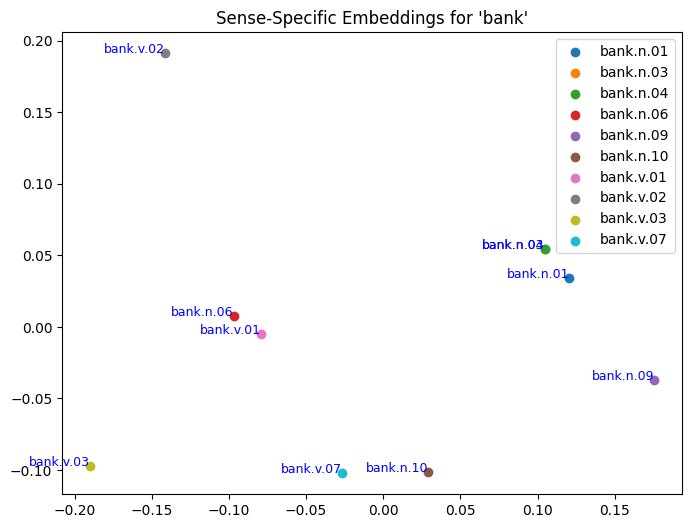

In [27]:
s_emb={}


def get_sense_definitions_and_examples(word):
    """
    Get WordNet sense definitions and examples for a given word.
    """
    senses = {}
    for synset in wn.synsets(word):
        # Filter synsets to include only those matching the POS type of interest (e.g., noun)
        if synset.name().startswith(word):
            senses[synset.name()] = {
                "definition": synset.definition(),
                "examples": synset.examples(),
            }
    return senses


def generate_sense_embeddings(word, senses, word_vectors):
    """
    Generate embeddings for each sense based on example sentences.
    """
    sense_embeddings = {}

    for sense, data in senses.items():
        examples = data["examples"]
        example_vectors = []

        for example in examples:
            # Tokenize the sentence and get embeddings for valid tokens
            tokens = example.split()
            valid_tokens = [t for t in tokens if t in word_vectors]
            if valid_tokens:
                vectors = np.array([word_vectors[t] for t in valid_tokens])
                example_vectors.append(np.mean(vectors, axis=0))  # Average the vectors

        if example_vectors:
            # Average embeddings across all examples for a sense
            sense_embeddings[sense] = np.mean(example_vectors, axis=0)
        else:
            print(f"No valid embeddings found for sense: {sense}")

    return sense_embeddings


def visualize_embeddings(word, sense_embeddings):
    """
    Visualize sense-specific embeddings using PCA.
    """
    if not sense_embeddings:
        print(f"No embeddings found for the word '{word}'")
        return

    vectors = list(sense_embeddings.values())
    labels = list(sense_embeddings.keys())

    # Apply PCA to reduce dimensions
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=label)
        plt.text(
            reduced_vectors[i, 0],
            reduced_vectors[i, 1],
            label,
            fontsize=9,
            ha="right",
            color="blue",
        )
    plt.title(f"Sense-Specific Embeddings for '{word}'")
    plt.legend()
    plt.show()


def main():
    # Word for which we differentiate senses
    word = "bank"

    # Load pre-trained embeddings
    

    # Step 1: Get senses from WordNet
    senses = get_sense_definitions_and_examples(word)
    print(f"Senses for '{word}':")
    for sense, details in senses.items():
        print(f" - {sense}: {details['definition']}")

    # Step 2: Generate sense embeddings
    sense_embeddings = generate_sense_embeddings(word, senses, word_vectors)
    print(sense_embeddings)
    # Step 3: Visualize the sense-specific embeddings
    visualize_embeddings(word, sense_embeddings)


if __name__ == "__main__":
    main()


In [26]:
s_emb

{}

In [29]:
vec1=[0.09868401, 0.06501311]
vec2=[0.00903691, 0.07447419]
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
vec1 =np.reshape(vec1,(1,-1))
vec2 = np.reshape(vec2,(1,-1))
similarity = cosine_similarity(vec1, vec2)

In [32]:
np.reshape(vec1,(1,-1))

array([[0.09868401, 0.06501311]])

In [34]:
similarity

array([[0.64673034]])

In [35]:
np.dot(vec1,vec2)

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

Senses for 'bank':
 - bank.n.01: sloping land (especially the slope beside a body of water)
 - bank.n.03: a long ridge or pile
 - bank.n.04: an arrangement of similar objects in a row or in tiers
 - bank.n.05: a supply or stock held in reserve for future use (especially in emergencies)
 - bank.n.06: the funds held by a gambling house or the dealer in some gambling games
 - bank.n.07: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
 - bank.n.09: a building in which the business of banking transacted
 - bank.n.10: a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
 - bank.v.01: tip laterally
 - bank.v.02: enclose with a bank
 - bank.v.03: do business with a bank or keep an account at a bank
 - bank.v.04: act as the banker in a game or in gambling
 - bank.v.05: be in the banking business
 - bank.v.07: cover with ashes so to control the rate of burning
No valid embe

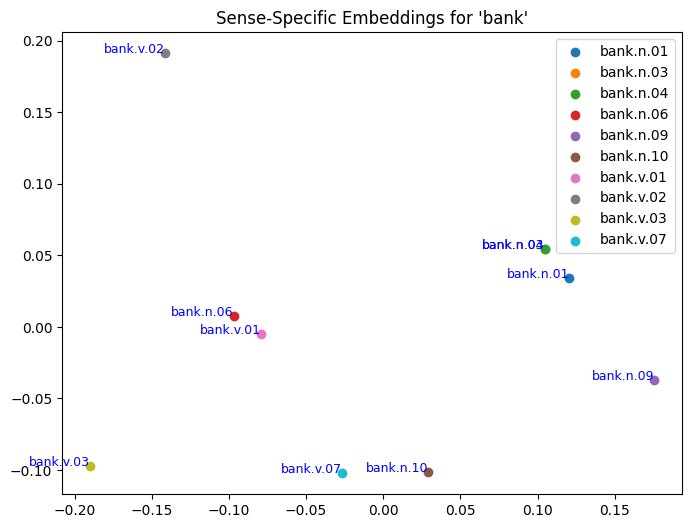

In [47]:


def get_sense_definitions_and_examples(word):
    """
    Get WordNet sense definitions and examples for a given word.
    """
    senses = {}
    for synset in wn.synsets(word):
        if synset.name().startswith(word):
            senses[synset.name()] = {
                "definition": synset.definition(),
                "examples": synset.examples(),
            }
    return senses


def generate_sense_embeddings(word, senses, word_vectors):
    """
    Generate embeddings for each sense based on example sentences.
    """
    sense_embeddings = {}

    for sense, data in senses.items():
        examples = data["examples"]
        example_vectors = []

        for example in examples:
            # Tokenize the sentence and get embeddings for valid tokens
            tokens = example.split()
            valid_tokens = [t for t in tokens if t in word_vectors]
            if valid_tokens:
                vectors = np.array([word_vectors[t] for t in valid_tokens])
                example_vectors.append(np.mean(vectors, axis=0))  # Average the vectors

        if example_vectors:
            sense_embeddings[sense] = np.mean(example_vectors, axis=0)
        else:
            print(f"No valid embeddings found for sense: {sense}")

    return sense_embeddings


def compute_cosine_similarity(vec1, vec2):
    """
    Compute cosine similarity between two vectors.
    """
    vec1 = vec1.reshape(1, -1)
    vec2 = vec2.reshape(1, -1)
    return cosine_similarity(vec1, vec2)[0][0]


def visualize_embeddings(word, sense_embeddings):
    """
    Visualize sense-specific embeddings using PCA.
    """
    if not sense_embeddings:
        print(f"No embeddings found for the word '{word}'")
        return

    vectors = list(sense_embeddings.values())
    labels = list(sense_embeddings.keys())

    # Apply PCA to reduce dimensions
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    # Plot the reduced vectors
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=label)
        plt.text(
            reduced_vectors[i, 0],
            reduced_vectors[i, 1],
            label,
            fontsize=9,
            ha="right",
            color="blue",
        )
    plt.title(f"Sense-Specific Embeddings for '{word}'")
    plt.legend()
    plt.show()


def main():
    # Word for which we differentiate senses
    word = "bank"

    # Load pre-trained embeddings
    

    # Step 1: Get senses from WordNet
    senses = get_sense_definitions_and_examples(word)
    print(f"Senses for '{word}':")
    for sense, details in senses.items():
        print(f" - {sense}: {details['definition']}")

    # Step 2: Generate sense embeddings
    sense_embeddings = generate_sense_embeddings(word, senses, word_vectors)

    # Step 3: Compute cosine similarity
    sense1 = "bank.n.01"  # Example sense: river bank
    sense2 = "bank.v.03"  # Example sense: financial institution

    if sense1 in sense_embeddings and sense2 in sense_embeddings:
        vec1 = sense_embeddings[sense1]
        vec2 = sense_embeddings[sense2]
        similarity = compute_cosine_similarity(vec1, vec2)
        print(f"Cosine similarity between '{sense1}' and '{sense2}': {similarity:.4f}")
    else:
        print(f"Embeddings for one or both senses '{sense1}' and '{sense2}' are missing.")

    # Step 4: Visualize the sense embeddings
    visualize_embeddings(word, sense_embeddings)


if __name__ == "__main__":
    main()


In [48]:
import spacy

In [51]:
python -m spacy download en_core_web_md

SyntaxError: invalid syntax (3273905641.py, line 1)

In [52]:
import numpy as np

from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

# Load pre-trained spaCy model
nlp = spacy.load("en_core_web_md")

# Function to calculate WordNet similarity
def wordnet_similarity(word1, word2):
    # Get synsets for the words
    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)
    
    max_similarity = 0
    
    # Calculate similarity between all pairs of synsets
    for synset1 in synsets1:
        for synset2 in synsets2:
            # Use Wu-Palmer similarity
            similarity = synset1.wup_similarity(synset2)
            if similarity is not None and similarity > max_similarity:
                max_similarity = similarity
                
    return max_similarity if max_similarity is not None else 0

# Function to calculate weighted cosine similarity
def weighted_cosine_similarity(vector_a, vector_b, weights=None):
    if weights is None:
        weights = np.ones_like(vector_a)  # Default weights as 1
    
    # Calculate weighted dot product
    weighted_dot_product = np.dot(weights * vector_a, weights * vector_b)
    
    # Calculate norms
    norm_a = np.linalg.norm(weights * vector_a)
    norm_b = np.linalg.norm(weights * vector_b)
    
    return weighted_dot_product / (norm_a * norm_b) if norm_a != 0 and norm_b != 0 else 0

# Function to calculate the average vector for a sentence
def sentence_vector(sentence):
    doc = nlp(sentence)
    return np.mean([word.vector for word in doc], axis=0)

# Function to calculate similarity between two sentences using weighted cosine similarity
def sentence_similarity(sentence1, sentence2):
    # Tokenize the sentences
    tokens1 = word_tokenize(sentence1.lower())
    tokens2 = word_tokenize(sentence2.lower())
    
    # Calculate word-level similarities using WordNet
    similarities = []
    weights = []
    
    for word1 in tokens1:
        for word2 in tokens2:
            similarity = wordnet_similarity(word1, word2)
            similarities.append(similarity)
            weights.append(similarity)  # Use WordNet similarity as weights
    
    # Calculate sentence vectors
    vector1 = sentence_vector(sentence1)
    vector2 = sentence_vector(sentence2)
    
    # Calculate weighted cosine similarity between the sentence vectors
    weighted_similarity = weighted_cosine_similarity(vector1, vector2, weights)
    
    return weighted_similarity

# Function to visualize similarity
def visualize_similarity(sentence1, sentence2):
    similarity = sentence_similarity(sentence1, sentence2)
    
    # Visualization
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar([1, 2], [similarity, 1-similarity], color=['blue', 'red'], alpha=0.6)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Weighted Cosine Similarity', 'Inverse Similarity'])
    ax.set_title(f'Similarity between Sentences: {similarity:.3f}')
    ax.set_ylabel('Similarity Score')
    plt.show()

# Example sentences
sentence1 = "The bank of the river was flooded."
sentence2 = "He went to the bank to withdraw money."

# Visualize the similarity and display the result
visualize_similarity(sentence1, sentence2)


C:\Users\ujwal\Twin_tower_model\twin_model\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: operands could not be broadcast together with shapes (72,) (300,) 

In [66]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import wordnet as wn
from nltk.corpus import reader
import pandas as pd
from nltk import download

# Download necessary WordNet data if not already downloaded
download('wordnet')

# Load spaCy's pre-trained model (en_core_web_md contains word vectors)
nlp = spacy.load('en_core_web_md')

# Load WordSim353 Dataset (you can download it from https://www.semanticnetwork.com/datasets/wordsim353)
# Here, we'll assume the dataset is in CSV format with columns "word1", "word2", and "similarity"
# This is a simplified version for demonstration purposes.
# Replace this with actual loading of WordSim353 data from your file.
wordsim_data = pd.read_csv("wordsim353crowd.csv")

def get_wordnet_synsets(word):
    """Get WordNet synsets for the word."""
    return wn.synsets(word)

def get_word_vector(word, model):
    """Get the word vector using spaCy."""
    return model(word).vector

def wordnet_similarity(word1, word2):
    """Calculate similarity between two words using WordNet's Wu-Palmer similarity."""
    synsets1 = get_wordnet_synsets(word1)
    synsets2 = get_wordnet_synsets(word2)
    
    max_sim = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            similarity = syn1.wup_similarity(syn2)
            if similarity and similarity > max_sim:
                max_sim = similarity
    return max_sim

def weighted_cosine_similarity(u, v, weights):
    """Calculate weighted cosine similarity between two vectors using context-specific weights."""
    numerator = np.sum(weights * u * v)
    denominator = (
        np.sqrt(np.sum(weights * u**2)) * np.sqrt(np.sum(weights * v**2))
    )
    return numerator / denominator

# Iterate through WordSim353 pairs and compute weighted cosine similarity
for _, row in wordsim_data.iterrows():
    word1 = row['Word 1']
    word2 = row['Word 2']
    
    # Get word vectors for the two words
    word1_vec = get_word_vector(word1, nlp)
    word2_vec = get_word_vector(word2, nlp)
    
    # Calculate WordNet similarity (used as a weight for the cosine similarity)
    wordnet_sim = wordnet_similarity(word1, word2)
    
    # Calculate similarity based on word vectors (standard cosine similarity)
    standard_similarity = cosine_similarity([word1_vec], [word2_vec])[0, 0]
    
    # Weighted Cosine Similarity (using WordNet similarity as the weight)
    weights = np.full_like(word1_vec, wordnet_sim)  # Applying uniform weight to all dimensions
    weighted_similarity = weighted_cosine_similarity(word1_vec, word2_vec, weights)
    
    # Display the results
    print(f"Word1: {word1}, Word2: {word2}")
    print(f"WordSim353 Similarity: {row['Human (Mean)']:.4f}")
    print(f"Standard Cosine Similarity: {standard_similarity:.4f}")
    print(f"Weighted Cosine Similarity: {weighted_similarity:.4f}")
    print("-" * 50)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ujwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word1: admission, Word2: ticket
WordSim353 Similarity: 5.5360
Standard Cosine Similarity: 0.2759
Weighted Cosine Similarity: 0.2759
--------------------------------------------------
Word1: alcohol, Word2: chemistry
WordSim353 Similarity: 4.1250
Standard Cosine Similarity: 0.2817
Weighted Cosine Similarity: 0.2817
--------------------------------------------------
Word1: aluminum, Word2: metal
WordSim353 Similarity: 6.6250
Standard Cosine Similarity: 0.7263
Weighted Cosine Similarity: 0.7263
--------------------------------------------------
Word1: announcement, Word2: effort
WordSim353 Similarity: 2.0625
Standard Cosine Similarity: 0.4197
Weighted Cosine Similarity: 0.4197
--------------------------------------------------
Word1: announcement, Word2: news
WordSim353 Similarity: 7.1875
Standard Cosine Similarity: 0.4556
Weighted Cosine Similarity: 0.4556
--------------------------------------------------
Word1: announcement, Word2: production
WordSim353 Similarity: 1.6875
Standard Cosi

C:\Users\ujwal\AppData\Local\Temp\ipykernel_14852\2686128419.py:48: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator


Word1: Mexico, Word2: Brazil
WordSim353 Similarity: 3.9375
Standard Cosine Similarity: 0.5988
Weighted Cosine Similarity: 0.5988
--------------------------------------------------
Word1: midday, Word2: noon
WordSim353 Similarity: 8.9375
Standard Cosine Similarity: 1.0000
Weighted Cosine Similarity: 1.0000
--------------------------------------------------
Word1: mile, Word2: kilometer
WordSim353 Similarity: 6.9375
Standard Cosine Similarity: 0.6910
Weighted Cosine Similarity: 0.6910
--------------------------------------------------
Word1: minister, Word2: party
WordSim353 Similarity: 3.0625
Standard Cosine Similarity: 0.3888
Weighted Cosine Similarity: 0.3888
--------------------------------------------------
Word1: ministry, Word2: culture
WordSim353 Similarity: 2.8440
Standard Cosine Similarity: 0.4127
Weighted Cosine Similarity: 0.4127
--------------------------------------------------
Word1: minority, Word2: peace
WordSim353 Similarity: 1.1875
Standard Cosine Similarity: 0.3168
We

In [63]:
wordsim_data

,Word 1,Word 2,Human (Mean)
0,admission,ticket,5.5360
1,alcohol,chemistry,4.1250
2,aluminum,metal,6.6250
3,announcement,effort,2.0625
4,announcement,news,7.1875
...,...,...,...
348,weapon,secret,2.5000
349,weather,forecast,5.4375
350,Wednesday,news,1.1250
351,wood,forest,7.9375


In [59]:
word1.shape

(300,)

In [64]:
for _, row in wordsim_data.iterrows():
    print(row)

Word 1          admission
Word 2             ticket
Human (Mean)        5.536
Name: 0, dtype: object
Word 1            alcohol
Word 2          chemistry
Human (Mean)        4.125
Name: 1, dtype: object
Word 1          aluminum
Word 2             metal
Human (Mean)       6.625
Name: 2, dtype: object
Word 1          announcement
Word 2                effort
Human (Mean)          2.0625
Name: 3, dtype: object
Word 1          announcement
Word 2                  news
Human (Mean)          7.1875
Name: 4, dtype: object
Word 1          announcement
Word 2            production
Human (Mean)          1.6875
Name: 5, dtype: object
Word 1          announcement
Word 2               warning
Human (Mean)           4.625
Name: 6, dtype: object
Word 1           Arafat
Word 2          Jackson
Human (Mean)        1.0
Name: 7, dtype: object
Word 1          Arafat
Word 2           peace
Human (Mean)     2.125
Name: 8, dtype: object
Word 1          Arafat
Word 2          terror
Human (Mean)    3.0625
Name